In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
indus=pd.read_csv(r'D:\GdriveBackup\0.Projects\Mock Projects\DE\Python\1000_Companies.csv')
x=indus.iloc[:,:-1].values
y=indus.iloc[:,4].values

indus.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<Axes: >

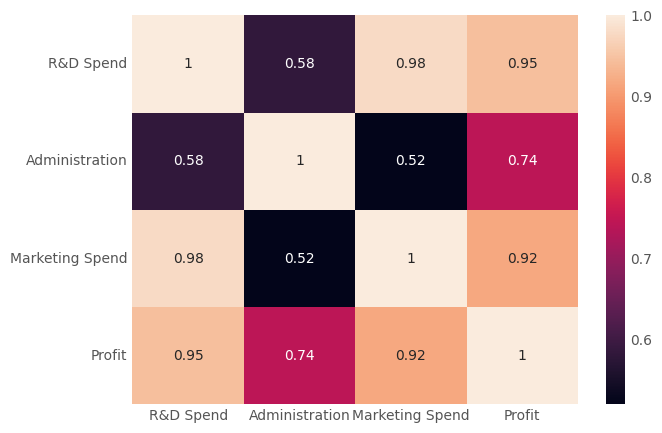

In [94]:
sns.heatmap(indus.drop(columns='State').corr(),annot=True)

In [95]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
x[:, 3] = labelencoder.fit_transform(x[:, 3])

# OneHotEncoding for categorical features
# Using ColumnTransformer to apply OneHotEncoder
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), [3])  # OneHotEncode the column at index 3
    ],
    remainder='passthrough'  # Leave other columns unchanged
)

# Fit and transform the data
x = column_transformer.fit_transform(x)

In [96]:
# avoiding dummy variable trap

x=x[:,1:]

In [97]:
#split ds into test and train model

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [98]:
#fit multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [99]:
# predicting the test set results

y_pred=regressor.predict(x_test)
y_pred

array([ 89394.23575033,  88027.95819515,  94508.53314456, 175549.39580414,
        83150.97998075, 110365.61149629, 131468.83716138,  91080.37178897,
       164499.09125686,  52845.80977356,  66508.01269668, 150384.61048744,
       126593.26898994,  58880.41811174, 177293.42838505,  75039.29849958,
       118001.51199867, 164327.97934564, 174978.34867381, 182006.18783201,
       124009.89479311,  85265.30904176, 180871.77326234,  83737.38254065,
       104639.96676191, 100860.1328575 ,  55972.52100477,  56567.46734372,
        68458.11806779, 211528.90031713, 120537.16479697, 111372.47323668,
       101263.40023153, 137751.9174904 ,  63521.80637148, 108499.76514776,
       185959.70818608, 171302.67161103, 174510.71530108, 117423.7029346 ,
        96497.33588966, 165207.59035386, 107363.9233561 ,  49811.45273477,
       116263.78584195,  58173.63390513, 158250.37929296,  78215.23575463,
       159564.20687059, 130917.09063892, 184767.68475629, 174475.4621405 ,
        93357.21436253,  

In [100]:
print(regressor.coef_)

[-7.89616003e+02 -5.51149301e+02  5.26047095e-01  9.78530820e-01
  9.80946128e-02]


In [101]:
print(regressor.intercept_)

-65676.83905542057


In [102]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9311120236268364

In [6]:
plt.style.use('ggplot')

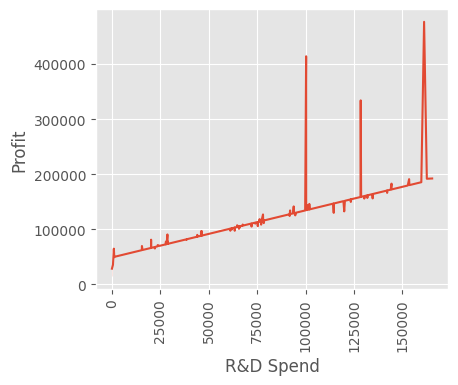

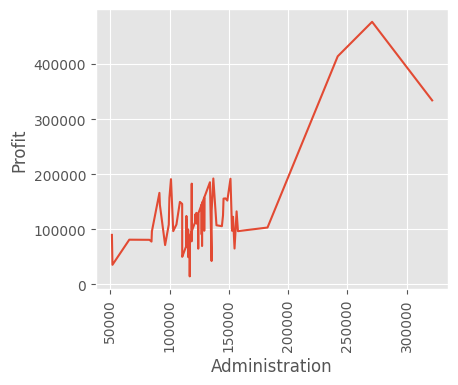

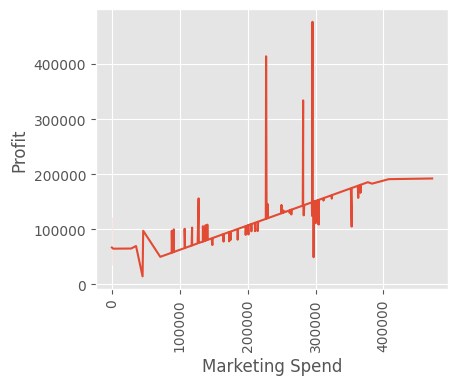

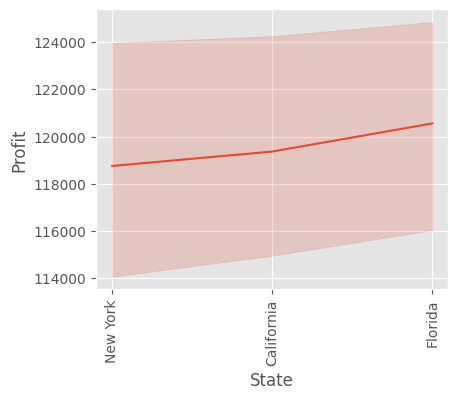

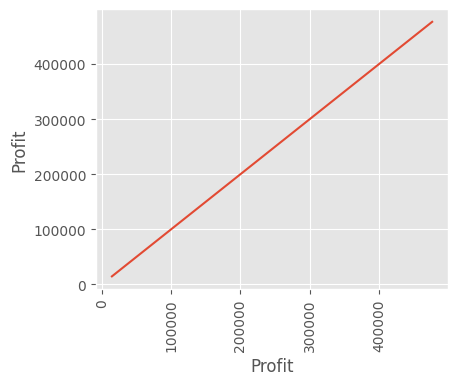

In [16]:
for columns in indus.columns:
    plt.figure(figsize=(10,8))
    plt.subplot(2,2,3)
    
    sns.lineplot(x=columns,y='Profit',data=indus)
    plt.xticks(rotation=90)
    plt.show()

### New Model Test : predicting the loyalty score of customers

In [33]:
data=pd.read_csv(r'D:\GdriveBackup\0.Projects\Mock Projects\DE\Python\Customer Purchasing Behaviors.csv')
data.sample()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
87,88,31,51000,340,5.6,North,17


In [34]:
data.set_index('user_id',inplace=True)

In [35]:
X=data.drop(columns=['loyalty_score']).values
y=data.iloc[:,3].values

data.head()

,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
user_id,,,,,,
1,25,45000,200,4.5,North,12
2,34,55000,350,7.0,South,18
3,45,65000,500,8.0,West,22
4,22,30000,150,3.0,East,10
5,29,47000,220,4.8,North,13


<Axes: >

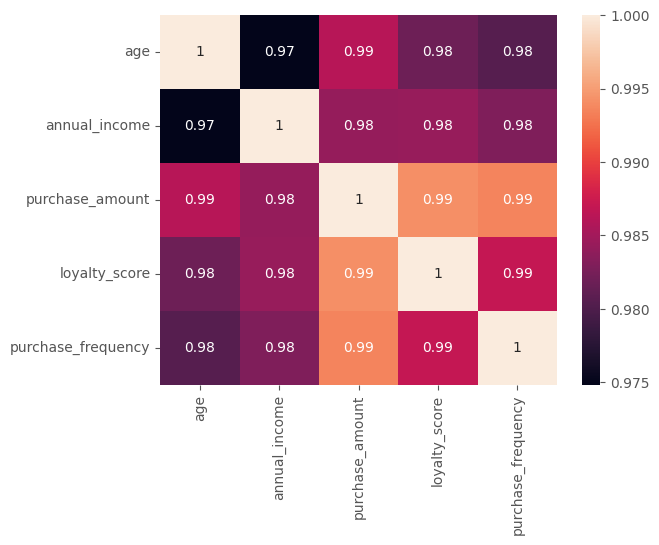

In [36]:
sns.heatmap(data.select_dtypes(include='number').corr(),annot=True)

In [37]:
print(X)  # or print(df.columns) to check column positions

[[25 45000 200 'North' 12]
 [34 55000 350 'South' 18]
 [45 65000 500 'West' 22]
 ...
 [54 74000 630 'South' 27]
 [32 52000 360 'West' 18]
 [31 51000 340 'North' 17]]


In [110]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder=LabelEncoder()
X[:,3]=labelencoder.fit_transform(X[:,3])

# Using ColumnTransformer to encode the 'region' column
column_transformer = ColumnTransformer(
    transformers=[
        ('region_encoder', OneHotEncoder(sparse_output=False), [3])  # Encoding the 'region' column
    ],
    remainder='passthrough'  # Keep the rest of the columns as they are
)

# Apply transformation
X_transformed = column_transformer.fit_transform(X)

# Now, you can proceed with further steps such as model fitting

In [111]:
# avoiding dummy variable trap

X=X[:,1:]

In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [113]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [114]:
y_pred=regressor.predict(X_test)
y_pred

array([9.51174205, 3.03655036, 9.17426945, 9.10878332, 6.41533383,
       9.04350284, 5.37463334, 8.02665699, 7.875254  , 6.7491124 ,
       4.16543443, 9.13653764, 5.78756955, 6.88035478, 7.20722108,
       9.51174205, 6.87276108, 6.88663824, 5.90192216, 4.31683743,
       5.65358469, 4.7165779 , 4.33071459, 9.51174205, 4.48923552,
       5.14017302, 7.20722108, 3.21570768, 4.53372656, 8.27499447,
       7.48939068, 9.10878332, 4.7165779 , 8.02665699, 8.49557762,
       4.7165779 , 7.94490992, 9.51174205, 6.88663824, 6.18087352,
       7.875254  , 4.26105866, 6.88035478, 4.16543443, 3.21570768,
       9.13653764, 9.36033905, 3.21570768])

In [115]:
print(regressor.coef_)

[ 3.77318064e-05  1.27548354e-02  1.38771607e-02 -7.22453607e-02]


In [116]:
print(regressor.intercept_)

0.6069125088704324


In [117]:
from sklearn.metrics import r2_score,root_mean_squared_error
r2_score(y_test,y_pred)

0.9911223762284054

In [118]:
root_mean_squared_error(y_test,y_pred)

np.float64(0.1915568430793115)

In [32]:
for column in data.columns:
    plt.subplot(2,2,3)
    sns.lineplot(x=column,y='loyalty_score',data=data)
    plt.show()

NameError: name 'data' is not defined

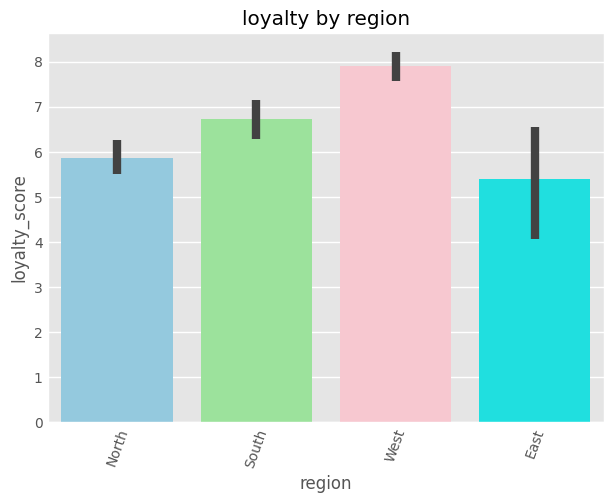

<Figure size 800x12000 with 0 Axes>

In [120]:
sns.barplot(x='region',y='loyalty_score',data=data,palette=['skyblue','lightgreen','pink','aqua']\
            ,hue='region',legend=False)


plt.title('loyalty by region')
plt.xticks(rotation=70)


plt.figure(figsize=(8,120))

plt.show()

In [121]:
data[['region','loyalty_score']].groupby('region').sum().reset_index()

,region,loyalty_score
0,East,32.4
1,North,457.5
2,South,517.9
3,West,609.2


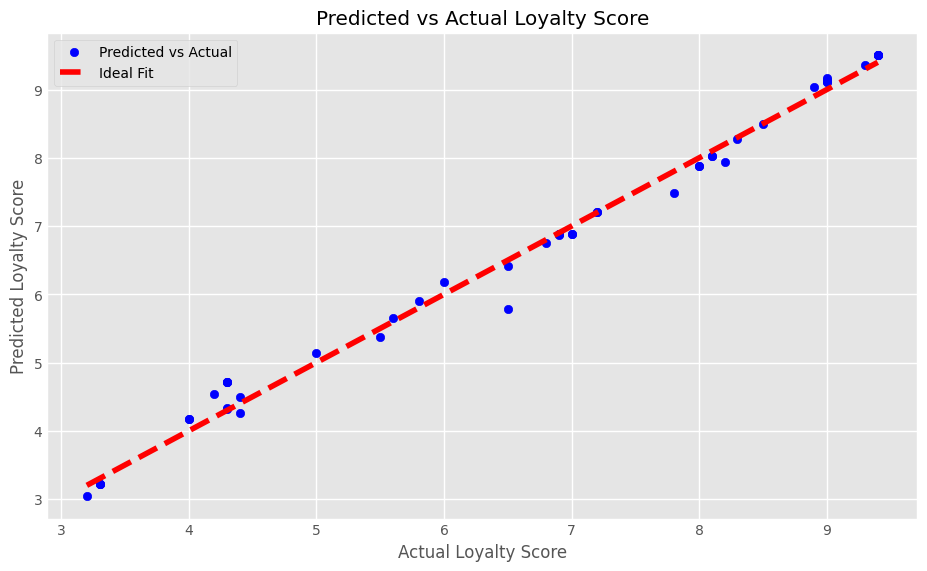

In [124]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')

# Add labels and title
plt.xlabel('Actual Loyalty Score')
plt.ylabel('Predicted Loyalty Score')
plt.title('Predicted vs Actual Loyalty Score')
plt.legend()

# Show plot
plt.show()

### Regression number 3

In [69]:
iris=pd.read_csv(r'D:\GdriveBackup\0.Projects\Mock Projects\DE\Python\datasets-session-24\iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


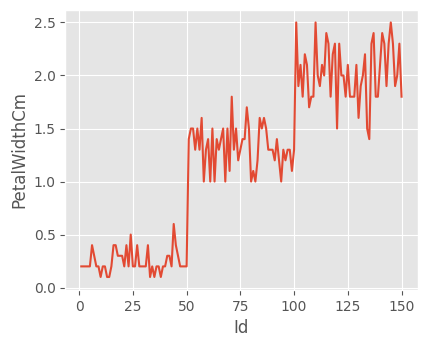

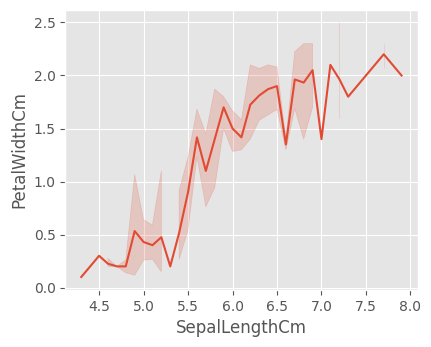

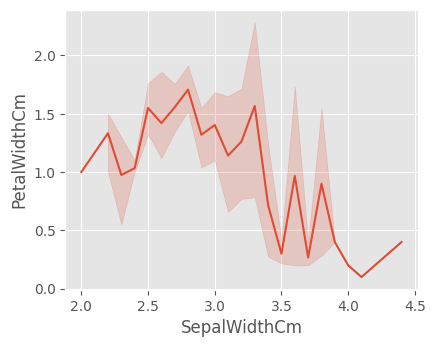

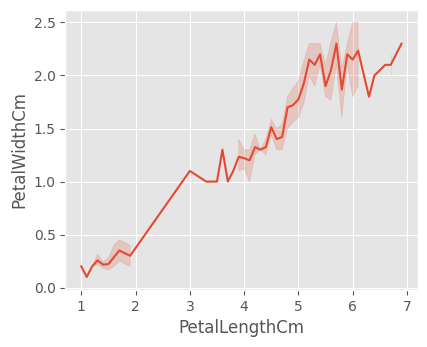

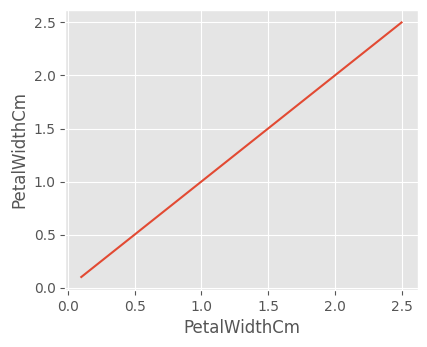

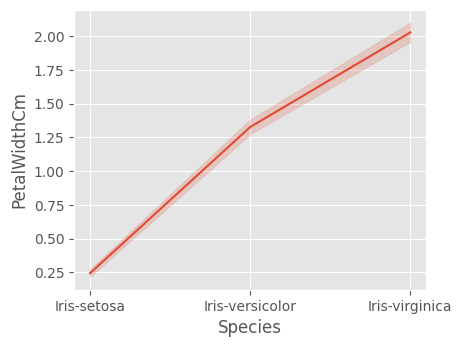

In [70]:
for i in iris.columns:
    plt.figure(figsize=(10,8))
    plt.subplot(2,2,1)
    sns.lineplot(x=i,y='PetalWidthCm',data=iris)

    plt.show()


In [71]:
iris.set_index('Id',inplace=True)

In [73]:
iris.sample()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
76,6.6,3.0,4.4,1.4,Iris-versicolor


In [74]:
X=iris.drop(columns='PetalWidthCm').values
y=iris.iloc[:,3]

<Axes: >

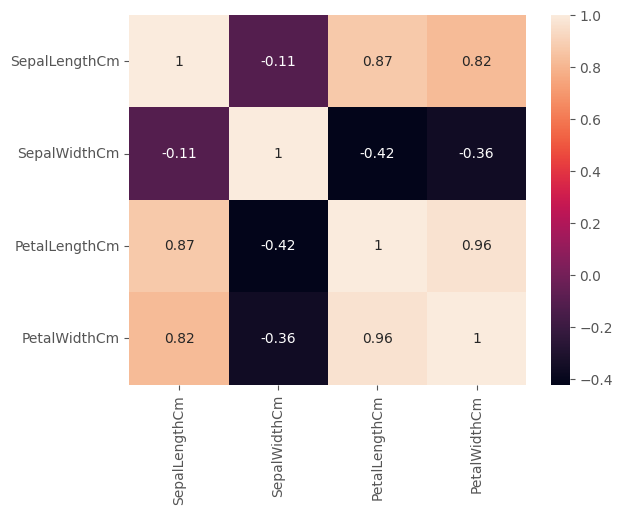

In [76]:
sns.heatmap(iris.select_dtypes(include='number').corr(),annot=True)

In [77]:
print(X)

[[5.1 3.5 1.4 'Iris-setosa']
 [4.9 3.0 1.4 'Iris-setosa']
 [4.7 3.2 1.3 'Iris-setosa']
 [4.6 3.1 1.5 'Iris-setosa']
 [5.0 3.6 1.4 'Iris-setosa']
 [5.4 3.9 1.7 'Iris-setosa']
 [4.6 3.4 1.4 'Iris-setosa']
 [5.0 3.4 1.5 'Iris-setosa']
 [4.4 2.9 1.4 'Iris-setosa']
 [4.9 3.1 1.5 'Iris-setosa']
 [5.4 3.7 1.5 'Iris-setosa']
 [4.8 3.4 1.6 'Iris-setosa']
 [4.8 3.0 1.4 'Iris-setosa']
 [4.3 3.0 1.1 'Iris-setosa']
 [5.8 4.0 1.2 'Iris-setosa']
 [5.7 4.4 1.5 'Iris-setosa']
 [5.4 3.9 1.3 'Iris-setosa']
 [5.1 3.5 1.4 'Iris-setosa']
 [5.7 3.8 1.7 'Iris-setosa']
 [5.1 3.8 1.5 'Iris-setosa']
 [5.4 3.4 1.7 'Iris-setosa']
 [5.1 3.7 1.5 'Iris-setosa']
 [4.6 3.6 1.0 'Iris-setosa']
 [5.1 3.3 1.7 'Iris-setosa']
 [4.8 3.4 1.9 'Iris-setosa']
 [5.0 3.0 1.6 'Iris-setosa']
 [5.0 3.4 1.6 'Iris-setosa']
 [5.2 3.5 1.5 'Iris-setosa']
 [5.2 3.4 1.4 'Iris-setosa']
 [4.7 3.2 1.6 'Iris-setosa']
 [4.8 3.1 1.6 'Iris-setosa']
 [5.4 3.4 1.5 'Iris-setosa']
 [5.2 4.1 1.5 'Iris-setosa']
 [5.5 4.2 1.4 'Iris-setosa']
 [4.9 3.1 1.5 

In [78]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
labelencoder=LabelEncoder()
X[:,3]=labelencoder.fit_transform(X[:,3])

# Using ColumnTransformer to encode the 'region' column
column_transformer = ColumnTransformer(
    transformers=[
        ('species_encoder', OneHotEncoder(sparse_output=False), [3])  # Encoding the 'species' column
    ],
    remainder='passthrough'  # Keep the rest of the columns as they are
)

# Apply transformation
X_transformed = column_transformer.fit_transform(X)


In [79]:
X=X[:,1:]

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [94]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [95]:
y_pred=regressor.predict(X_test)
y_pred

array([1.39640068, 0.39095525, 2.31347218, 1.36004182, 1.4217128 ,
       0.28326951, 1.13223277, 1.92918097, 1.26018419, 1.17963837,
       1.94344635, 0.20089589, 0.24691066, 0.24047338, 0.34033102,
       1.46772756, 2.09210041, 1.15110762, 1.34577645, 2.01294542,
       0.28005088, 1.86429136, 0.30858163, 2.01294542, 2.35809612,
       1.94022771, 2.02077353, 2.14594328, 0.20089589, 0.2657855 ,
       0.18523968, 0.42592328, 1.36326046, 0.30858163, 0.20411453,
       1.81827659, 1.40283795, 0.29753489, 0.28648815, 0.38312715,
       1.87211946, 1.43136871, 1.43919681, 0.30397216, 0.32606564])

In [96]:
print(regressor.coef_)

[0.14265377 0.25312117 0.38873569]


In [97]:
print(regressor.intercept_)

-0.5814350372073505


In [98]:
from sklearn.metrics import r2_score,root_mean_squared_error
r2_score(y_test,y_pred)


0.9662740706114975

In [99]:
root_mean_squared_error(y_test,y_pred)

np.float64(0.14652875524557707)

In [114]:
iris.iloc[:,:-1]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
